# Load Dataset & Libraries

In [1]:
%pip install datasets
%pip install datasets --upgrade
%pip install datasets --user
%pip install IPython
%pip install torch torchvision transformers
%pip install --upgrade fsspec
%pip install tqdm
%pip install --upgrade tensorflow
%pip install --upgrade tensorflow-datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset
from IPython.display import display
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

g:\Anaconda\Anaconda_Directory\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset = load_dataset("marmal88/skin_cancer")

In [5]:
# Convert Dataset to a pandas DataFrame
df_train = pd.DataFrame(dataset["train"])
df_val = pd.DataFrame(dataset["validation"])
df_test = pd.DataFrame(dataset["test"])

df_train.head()

,image,image_id,lesion_id,dx,dx_type,age,sex,localization
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024329,HAM_0002954,actinic_keratoses,histo,75.0,female,lower extremity
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024372,HAM_0005389,actinic_keratoses,histo,70.0,male,lower extremity
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024418,HAM_0003380,actinic_keratoses,histo,75.0,female,lower extremity
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024450,HAM_0005505,actinic_keratoses,histo,50.0,male,upper extremity
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,ISIC_0024463,HAM_0004568,actinic_keratoses,histo,50.0,male,upper extremity


# Data Preprocessing

In [6]:
df_train.isnull().sum()

image            0
image_id         0
lesion_id        0
dx               0
dx_type          0
age             55
sex              0
localization     0
dtype: int64

In [7]:
df_val.isnull().sum()

image            0
image_id         0
lesion_id        0
dx               0
dx_type          0
age             14
sex              0
localization     0
dtype: int64

In [8]:
df_test.isnull().sum()

image            0
image_id         0
lesion_id        0
dx               0
dx_type          0
age             10
sex              0
localization     0
dtype: int64

g:\Anaconda\Anaconda_Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


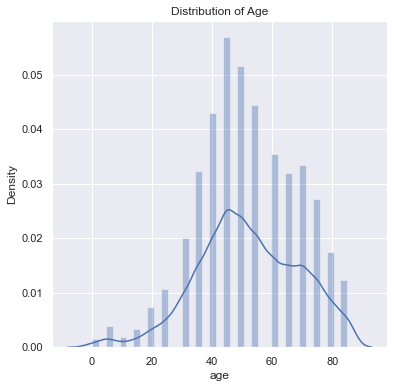

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_train['age'])
plt.title('Distribution of Age')
plt.show()

In [10]:
df_train['age'].fillna(df_train['age'].mean(), inplace=True)
df_val['age'].fillna(df_val['age'].mean(), inplace=True)
df_test['age'].fillna(df_test['age'].mean(), inplace=True)

In [11]:
df_train.isnull().sum()

image           0
image_id        0
lesion_id       0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

g:\Anaconda\Anaconda_Directory\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


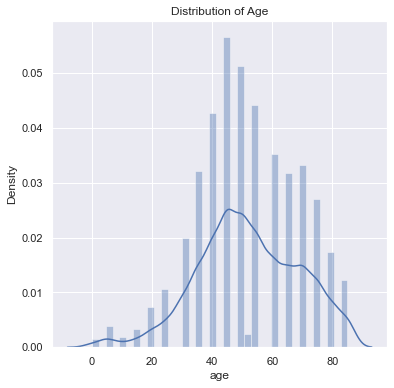

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df_train['age'])
plt.title('Distribution of Age')
plt.show()

In [13]:
df_train_new = df_train.drop(columns=['image_id', 'lesion_id', 'dx_type'])
df_val = df_val.drop(columns=['image_id', 'lesion_id', 'dx_type'])
df_test =df_test.drop(columns=['image_id', 'lesion_id', 'dx_type'])

In [14]:
df_train_new.head()

,image,dx,age,sex,localization
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,actinic_keratoses,75.0,female,lower extremity
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,actinic_keratoses,70.0,male,lower extremity
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,actinic_keratoses,75.0,female,lower extremity
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,actinic_keratoses,50.0,male,upper extremity
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,actinic_keratoses,50.0,male,upper extremity


In [15]:
end_column = ['dx']
df_train_new = df_train_new[[column for column in df_train_new if column not in end_column] + [column for column in end_column if column in df_train_new]]
df_val = df_val[[column for column in df_val if column not in end_column] + [column for column in end_column if column in df_val]]
df_test = df_test[[column for column in df_test if column not in end_column] + [column for column in end_column if column in df_test]]
df_train_new.head()

,image,age,sex,localization,dx
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,75.0,female,lower extremity,actinic_keratoses
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,70.0,male,lower extremity,actinic_keratoses
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,75.0,female,lower extremity,actinic_keratoses
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,50.0,male,upper extremity,actinic_keratoses
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,50.0,male,upper extremity,actinic_keratoses


In [16]:
df_train_new['dx'].value_counts()

melanocytic_Nevi                 6405
melanoma                         1076
benign_keratosis-like_lesions    1048
basal_cell_carcinoma              487
actinic_keratoses                 315
vascular_lesions                  136
dermatofibroma                    110
Name: dx, dtype: int64

melanocytic_Nevi                 6405
melanoma                         1076
benign_keratosis-like_lesions    1048
basal_cell_carcinoma              487
actinic_keratoses                 315
vascular_lesions                  136
dermatofibroma                    110
Name: dx, dtype: int64
Proportion: 5.95 : 1


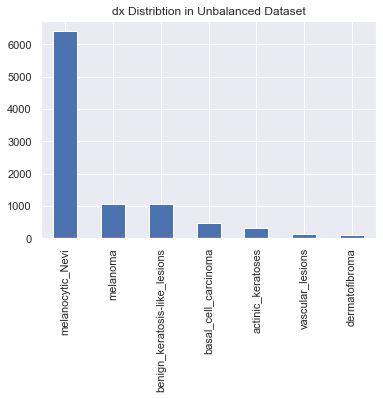

In [17]:
count = df_train_new['dx'].value_counts()
print(count)
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='dx Distribtion in Unbalanced Dataset');

In [18]:
# Split the data into two subsets based on the "label_sexist" column
melanocytic_Nevi = df_train_new[df_train_new['dx'] == 'melanocytic_Nevi']
melanoma = df_train_new[df_train_new['dx'] == 'melanoma']
benign_keratosis_like_lesions = df_train_new[df_train_new['dx'] == 'benign_keratosis-like_lesions']
basal_cell_carcinoma = df_train_new[df_train_new['dx'] == 'basal_cell_carcinoma']
actinic_keratoses = df_train_new[df_train_new['dx'] == 'actinic_keratoses']
vascular_lesions = df_train_new[df_train_new['dx'] == 'vascular_lesions']
dermatofibroma = df_train_new[df_train_new['dx'] == 'dermatofibroma']

# Determine the size of the minority and majority classes
melanocytic_Nevi_size = len(melanocytic_Nevi) # majority size
melanoma_size = len(melanoma)
benign_keratosis_like_lesions_size = len(benign_keratosis_like_lesions)
basal_cell_carcinoma_size = len(basal_cell_carcinoma)
actinic_keratoses_size = len(actinic_keratoses)
vascular_lesions_size = len(vascular_lesions)
dermatofibroma_size = len(dermatofibroma)

# Compute the oversampling ratio
melanoma_oversampling_ratio = int(melanocytic_Nevi_size / melanoma_size)
benign_keratosis_like_lesions_oversampling_ratio = int(melanocytic_Nevi_size / benign_keratosis_like_lesions_size)
basal_cell_carcinoma_oversampling_ratio = int(melanocytic_Nevi_size / basal_cell_carcinoma_size)
actinic_keratoses_oversampling_ratio = int(melanocytic_Nevi_size / actinic_keratoses_size)
vascular_lesions_oversampling_ratio = int(melanocytic_Nevi_size / vascular_lesions_size)
dermatofibroma_oversampling_ratio = int(melanocytic_Nevi_size / dermatofibroma_size)

# Oversample the minority class by duplicating examples
oversampled_melanoma = melanoma.sample(n=melanoma_size * melanoma_oversampling_ratio, replace=True)
oversampled_benign_keratosis_like_lesions = benign_keratosis_like_lesions.sample(n=benign_keratosis_like_lesions_size * benign_keratosis_like_lesions_oversampling_ratio, replace=True)
oversampled_basal_cell_carcinoma = basal_cell_carcinoma.sample(n=basal_cell_carcinoma_size * basal_cell_carcinoma_oversampling_ratio, replace=True)
oversampled_actinic_keratoses = actinic_keratoses.sample(n=actinic_keratoses_size * actinic_keratoses_oversampling_ratio, replace=True)
oversampled_vascular_lesions = vascular_lesions.sample(n=vascular_lesions_size * vascular_lesions_oversampling_ratio, replace=True)
oversampled_dermatofibroma = dermatofibroma.sample(n=dermatofibroma_size * dermatofibroma_oversampling_ratio, replace=True)

# Combine the oversampled minority class with the majority class
df_train_balanced = pd.concat([melanocytic_Nevi, oversampled_melanoma, oversampled_benign_keratosis_like_lesions, oversampled_basal_cell_carcinoma, oversampled_actinic_keratoses, oversampled_vascular_lesions, oversampled_dermatofibroma])

# Shuffle the rows of the data to avoid any bias
df_train_balanced = df_train_balanced.sample(frac=1).reset_index(drop=True)

melanocytic_Nevi                 6405
vascular_lesions                 6392
dermatofibroma                   6380
basal_cell_carcinoma             6331
actinic_keratoses                6300
benign_keratosis-like_lesions    6288
melanoma                         5380
Name: dx, dtype: int64
Proportion: 1.0 : 1


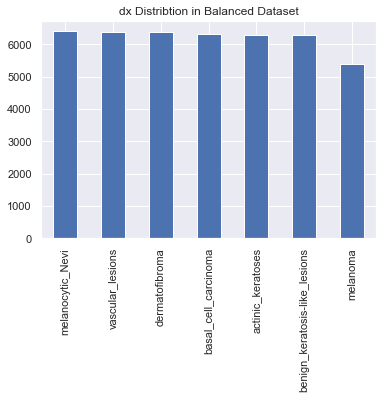

In [19]:
count = df_train_balanced['dx'].value_counts()
print(count)
print('Proportion:', round(count[0] / count[1], 2), ': 1')

count.plot(kind='bar', title='dx Distribtion in Balanced Dataset');

In [20]:
df_train_balanced.head()

,image,age,sex,localization,dx
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,85.0,female,face,basal_cell_carcinoma
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,55.0,female,lower extremity,dermatofibroma
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,60.0,male,lower extremity,dermatofibroma
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,60.0,male,upper extremity,melanoma
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,55.0,female,face,actinic_keratoses


In [21]:
df_train_balanced.dtypes

image            object
age             float64
sex              object
localization     object
dx               object
dtype: object

# Image Processing

In [24]:
import pandas as pd
import numpy as np

# Function to convert a PIL image to a numerical feature vector
def pil_image_to_feature_vector(image, target_size):
    image = image.resize(target_size)
    image_array = np.array(image)
    return image_array.flatten()  # Flatten the image array into a 1D array

# Specify the target size for resizing images (e.g., (64, 64) or (128, 128))
target_size = (64, 64)  # Adjust as needed

TRAIN

In [25]:
df_train_metadata = df_train_balanced

In [26]:
# Convert each PIL image in the 'image' column of the training set to a feature vector
df_train_metadata['image_feature'] = df_train_metadata['image'].apply(lambda x: pil_image_to_feature_vector(x, target_size))

# Drop the original 'image' column of the training set
df_train_metadata.drop('image', axis=1, inplace=True)

# Move dx column of the training set to the right
end_column = ['dx']
df_train_vect = df_train_metadata[[column for column in df_train_metadata if column not in end_column] + [column for column in end_column if column in df_train_metadata]]
df_train_vect.head()

,age,sex,localization,image_feature,dx
0,85.0,female,face,"[61, 40, 40, 91, 59, 58, 122, 80, 77, 142, 94,...",basal_cell_carcinoma
1,55.0,female,lower extremity,"[225, 138, 138, 227, 142, 143, 225, 144, 146, ...",dermatofibroma
2,60.0,male,lower extremity,"[226, 171, 194, 225, 167, 191, 224, 168, 195, ...",dermatofibroma
3,60.0,male,upper extremity,"[162, 121, 136, 165, 125, 141, 169, 127, 144, ...",melanoma
4,55.0,female,face,"[193, 139, 161, 191, 137, 152, 186, 132, 144, ...",actinic_keratoses


VALIDATION

In [27]:
df_val_metadata = df_val

In [28]:
# Convert each PIL image in the 'image' column of the training set to a feature vector
df_val_metadata['image_feature'] = df_val_metadata['image'].apply(lambda x: pil_image_to_feature_vector(x, target_size))

# Drop the original 'image' column of the training set
df_val_metadata.drop('image', axis=1, inplace=True)

# Move dx column of the training set to the right
end_column = ['dx']
df_val_vect = df_val_metadata[[column for column in df_val_metadata if column not in end_column] + [column for column in end_column if column in df_val_metadata]]
df_val_vect.head()

,age,sex,localization,image_feature,dx
0,50.0,male,upper extremity,"[92, 60, 61, 128, 91, 93, 158, 121, 120, 179, ...",actinic_keratoses
1,60.0,male,upper extremity,"[181, 125, 116, 177, 119, 110, 177, 121, 115, ...",actinic_keratoses
2,55.0,female,face,"[159, 128, 137, 162, 134, 144, 163, 133, 139, ...",actinic_keratoses
3,70.0,female,upper extremity,"[183, 124, 98, 183, 120, 92, 178, 114, 85, 174...",actinic_keratoses
4,75.0,male,abdomen,"[191, 169, 180, 190, 166, 177, 192, 171, 183, ...",actinic_keratoses


TEST

In [29]:
df_test_metadata = df_test

In [30]:
# Convert each PIL image in the 'image' column of the training set to a feature vector
df_test_metadata['image_feature'] = df_test_metadata['image'].apply(lambda x: pil_image_to_feature_vector(x, target_size))

# Drop the original 'image' column of the training set
df_test_metadata.drop('image', axis=1, inplace=True)

# Move dx column of the training set to the right
end_column = ['dx']
df_test_vect = df_test_metadata[[column for column in df_test_metadata if column not in end_column] + [column for column in end_column if column in df_test_metadata]]
df_test_vect.head()

,age,sex,localization,image_feature,dx
0,75.0,female,lower extremity,"[168, 139, 127, 168, 138, 127, 172, 144, 133, ...",actinic_keratoses
1,75.0,female,lower extremity,"[42, 32, 36, 44, 33, 34, 44, 33, 34, 40, 31, 3...",actinic_keratoses
2,60.0,male,face,"[170, 117, 145, 169, 114, 135, 167, 114, 135, ...",actinic_keratoses
3,65.0,male,ear,"[165, 92, 95, 167, 92, 93, 172, 96, 98, 182, 1...",actinic_keratoses
4,75.0,male,lower extremity,"[210, 178, 175, 210, 176, 174, 215, 184, 184, ...",actinic_keratoses


# Data Preparation

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Combine categorical features before one-hot encoding
combined_categorical = pd.concat([df_train_vect[['sex', 'localization']], df_val_vect[['sex', 'localization']], df_test_vect[['sex', 'localization']]])

# Apply one-hot encoding to combined categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
X_categorical_encoded = encoder.fit_transform(combined_categorical)

# Split the encoded categorical features back into training, validation, and test sets
X_train_categorical_encoded = X_categorical_encoded[:len(df_train_vect)]
X_val_categorical_encoded = X_categorical_encoded[len(df_train_vect):len(df_train_vect) + len(df_val_vect)]
X_test_categorical_encoded = X_categorical_encoded[len(df_train_vect) + len(df_val_vect):]

TRAIN

In [32]:
# Split the data of the training set into features (X) and target labels (y)
X_train_images = df_train_vect['image_feature'].tolist()
X_train_numeric = df_train_vect[['age']].values

# Combine all feature types of the training set into a single feature matrix
X_train = np.hstack((X_train_images, X_train_numeric, X_train_categorical_encoded))

Y_train = df_train_vect['dx']

# Standardize the numerical features of the training set
scaler = StandardScaler()
X_train[:, -3:] = scaler.fit_transform(X_train[:, -3:])

In [33]:
X_train.shape

(43476, 12305)

VALIDATION

In [34]:
# Split the data of the validation set into features (X) and target labels (y)
X_val_images = df_val_vect['image_feature'].tolist()
X_val_numeric = df_val_vect[['age']].values

# Combine all feature types of the validation set into a single feature matrix
X_val = np.hstack((X_val_images, X_val_numeric, X_val_categorical_encoded))
Y_val = df_val_vect['dx']

# Standardize the numerical features of the validation set using the same fitted scaler
X_val[:, -3:] = scaler.transform(X_val[:, -3:])

TEST

In [35]:
# Split the data of the test set into features (X) and target labels (y)
X_test_images = df_test_vect['image_feature'].tolist()
X_test_numeric = df_test_vect[['age']].values

# Combine all feature types of the test set into a single feature matrix
X_test = np.hstack((X_test_images, X_test_numeric, X_test_categorical_encoded))
Y_test = df_test_vect['dx']

# Standardize the numerical features of the test set using the same fitted scaler
X_test[:, -3:] = scaler.transform(X_test[:, -3:])

# Random Forest

In [36]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

# trees = [50, 100, 200]

# for tree in trees:
#     # Create a Random Forest classifier
#     random_forest_classifier = RandomForestClassifier(n_estimators=tree, random_state=42)

#     # Train the Random Forest on the training data
#     random_forest_classifier.fit(X_train, Y_train)

#     # Predict on the validation set
#     Y_val_pred_rf = random_forest_classifier.predict(X_val)

#     # Evaluate the model on the validation set
#     print(f'Random Forest Accuracy Measures with {tree} No. of Trees:')
#     print('F1 Score:', f1_score(Y_val, Y_val_pred_rf, average='weighted'))
#     print('Accuracy:', accuracy_score(Y_val, Y_val_pred_rf))
#     print('Precision:', precision_score(Y_val, Y_val_pred_rf, average='weighted'))
#     print('Recall:', recall_score(Y_val, Y_val_pred_rf, average='weighted'))
#     print('\n')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest on the training data
random_forest_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Predict on the test set
Y_test_pred_rf = random_forest_classifier.predict(X_test)

In [40]:
# Evaluate the model on the test set
print('Random Forest Accuracy Measures:')
print('F1 Score:', f1_score(Y_test, Y_test_pred_rf, average='weighted'))
print('Accuracy:', accuracy_score(Y_test, Y_test_pred_rf))
print('Precision:', precision_score(Y_test, Y_test_pred_rf, average='weighted'))
print('Recall:', recall_score(Y_test, Y_test_pred_rf, average='weighted'))

Random Forest Accuracy Measures:
F1 Score: 0.9398319414649098
Accuracy: 0.9408560311284047
Precision: 0.9407906646442658
Recall: 0.9408560311284047


Confusion Matrix

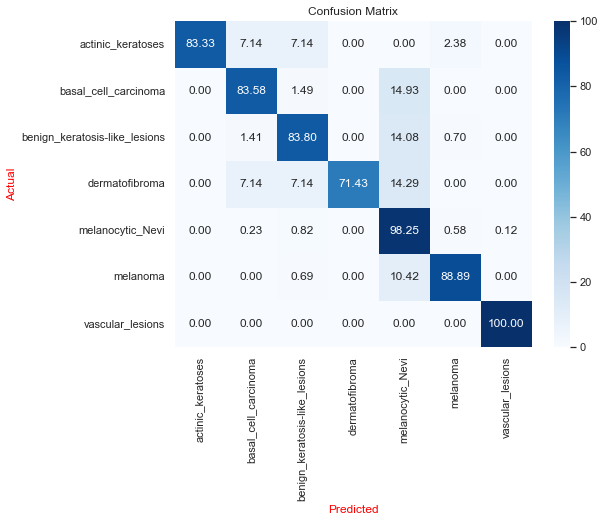

In [41]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_test_pred_rf)

# Get the actual class labels from your dataset (replace 'class_labels' with the actual labels)
class_labels = df_train['dx'].unique().tolist()

# Calculate percentages and visualize the confusion matrix using a heatmap
percentage_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] * 100

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_confusion_mat, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted',color='red')
plt.ylabel('Actual', color='red')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [42]:
# from sklearn.tree import DecisionTreeClassifier

# criterions = ['gini', 'entropy']

# # Create an KNN classifier
# for criterion in criterions:
#     # Create a Decision Tree classifier
#     decision_tree_classifier = DecisionTreeClassifier(criterion=criterion)

#     # Train the KNN on the training data
#     decision_tree_classifier.fit(X_train, Y_train)

#     # Predict on the validation set
#     Y_val_pred_dt = decision_tree_classifier.predict(X_val)

#     # Evaluate the model on the test set
#     print('Decison Tree Accuracy Measures:')
#     print('F1 Score:', f1_score(Y_val, Y_val_pred_dt, average='weighted'))
#     print('Accuracy:', accuracy_score(Y_val, Y_val_pred_dt))
#     print('Precision:', precision_score(Y_val, Y_val_pred_dt, average='weighted'))
#     print('Recall:', recall_score(Y_val, Y_val_pred_dt, average='weighted'))
#     print('\n')

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the Decision Tree on the training data
decision_tree_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [44]:
# Predict on the validation set
Y_val_pred_dt = decision_tree_classifier.predict(X_val)

In [45]:
# Evaluate the model on the validation set
print('Decison Tree Accuracy Measures:')
print('F1 Score:', f1_score(Y_val, Y_val_pred_dt, average='weighted'))
print('Accuracy:', accuracy_score(Y_val, Y_val_pred_dt))
print('Precision:', precision_score(Y_val, Y_val_pred_dt, average='weighted'))
print('Recall:', recall_score(Y_val, Y_val_pred_dt, average='weighted'))

Decison Tree Accuracy Measures:
F1 Score: 0.9432315457636692
Accuracy: 0.9430176565008026
Precision: 0.9436431508920714
Recall: 0.9430176565008026


In [46]:
# Predict on the test set
Y_test_pred_dt = decision_tree_classifier.predict(X_test)

In [47]:
# Evaluate the model on the test set
print('Decison Tree Accuracy Measures:')
print('F1 Score:', f1_score(Y_test, Y_test_pred_dt, average='weighted'))
print('Accuracy:', accuracy_score(Y_test, Y_test_pred_dt))
print('Precision:', precision_score(Y_test, Y_test_pred_dt, average='weighted'))
print('Recall:', recall_score(Y_test, Y_test_pred_dt, average='weighted'))

Decison Tree Accuracy Measures:
F1 Score: 0.9267428128434625
Accuracy: 0.9260700389105059
Precision: 0.9280620985434773
Recall: 0.9260700389105059


Confusion Matrix

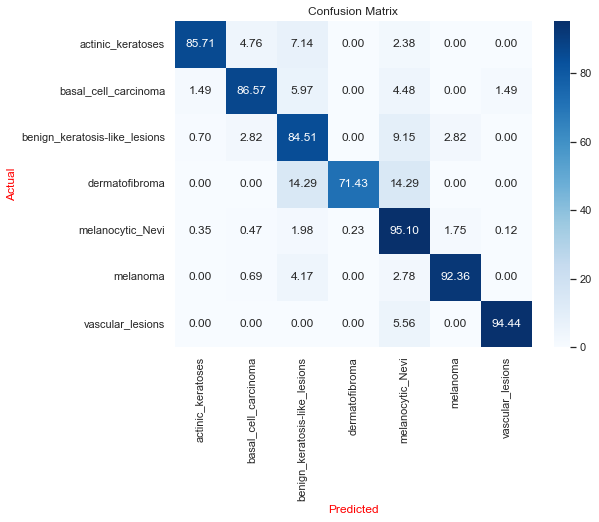

In [48]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_test_pred_dt)

# Get the actual class labels from your dataset (replace 'class_labels' with the actual labels)
class_labels = df_train['dx'].unique().tolist()

# Calculate percentages and visualize the confusion matrix using a heatmap
percentage_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] * 100

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_confusion_mat, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted',color='red')
plt.ylabel('Actual', color='red')
plt.title('Confusion Matrix')
plt.show()

# K Nearest Neighbors

In [49]:
# from sklearn.neighbors import KNeighborsClassifier

# neighbors = [1, 2, 5, 10, 15, 20]

# # Create an KNN classifier
# for neighbor in neighbors:
#     knn_classifier = KNeighborsClassifier(n_neighbors=neighbor)

#     # Train the KNN on the training data
#     knn_classifier.fit(X_train, Y_train)

#     # Predict on the test set
#     Y_val_pred_knn = knn_classifier.predict(X_val)

#     # Evaluate the model on the test set
#     print(f'KNN Accuracy Measures For {neighbor} Neighbors')
#     print('F1 Score:', f1_score(Y_val, Y_val_pred_knn, average='weighted'))
#     print('Accuracy:', accuracy_score(Y_val, Y_val_pred_knn))
#     print('Precision:', precision_score(Y_val, Y_val_pred_knn, average='weighted'))
#     print('Recall:', recall_score(Y_val, Y_val_pred_knn, average='weighted'))
#     print('\n')

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create an KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Train the KNN on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# Predict on the test set
Y_test_pred_knn = knn_classifier.predict(X_test)

In [52]:
# Evaluate the model on the test set
print('KNN Accuracy Measures:')
print('F1 Score:', f1_score(Y_test, Y_test_pred_knn, average='weighted'))
print('Accuracy:', accuracy_score(Y_test, Y_test_pred_knn))
print('Precision:', precision_score(Y_test, Y_test_pred_knn, average='weighted'))
print('Recall:', recall_score(Y_test, Y_test_pred_knn, average='weighted'))

KNN Accuracy Measures:
F1 Score: 0.9366043244866316
Accuracy: 0.9369649805447471
Precision: 0.9367828756956526
Recall: 0.9369649805447471


Confusion Matrix

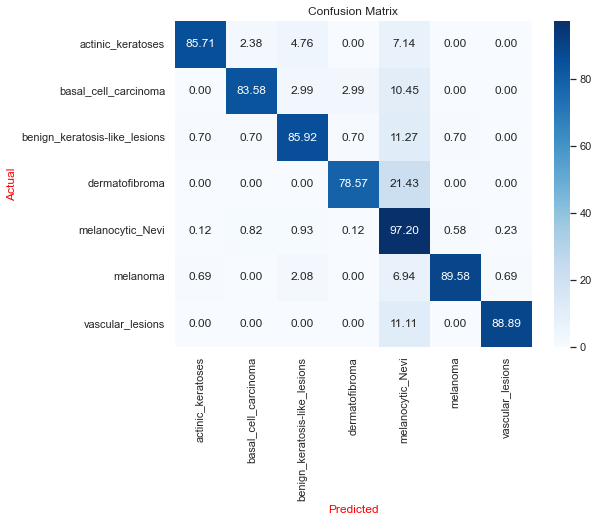

In [53]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_test_pred_knn)

# Get the actual class labels from your dataset (replace 'class_labels' with the actual labels)
class_labels = df_train['dx'].unique().tolist()

# Calculate percentages and visualize the confusion matrix using a heatmap
percentage_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] * 100

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_confusion_mat, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted',color='red')
plt.ylabel('Actual', color='red')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [54]:
# from sklearn.svm import SVC

# kernels = ['linear', 'poly', 'sigmoid']

# # Create an KNN classifier
# for kernel in kernels:
#     # Create an SVM classifier
#     svm_classifier = SVC(kernel=kernel)

#     # Train the SVM on the training data
#     svm_classifier.fit(X_train, Y_train)

#     # Predict on the validation set
#     Y_val_pred_svm = svm_classifier.predict(X_val)

#     # Evaluate the model on the validation set
#     print('SVM Accuracy Measures with {kernel} Kernel:')
#     print('F1 Score:', f1_score(Y_val, Y_val_pred_svm, average='weighted'))
#     print('Accuracy:', accuracy_score(Y_val, Y_val_pred_svm))
#     print('Precision:', precision_score(Y_val, Y_val_pred_svm, average='weighted'))
#     print('Recall:', recall_score(Y_val, Y_val_pred_svm, average='weighted'))
#     print('\n')

In [55]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='poly')

# Train the SVM on the training data
svm_classifier.fit(X_train, Y_train)

SVC(kernel='poly')

In [56]:
# Predict on the test set
Y_test_pred_svm = svm_classifier.predict(X_test)

In [57]:
# Evaluate the model on the test set
print('SVM Accuracy Measures:')
print('F1 Score:', f1_score(Y_test, Y_test_pred_svm, average='weighted'))
print('Accuracy:', accuracy_score(Y_test, Y_test_pred_svm))
print('Precision:', precision_score(Y_test, Y_test_pred_svm, average='weighted'))
print('Recall:', recall_score(Y_test, Y_test_pred_svm, average='weighted'))

SVM Accuracy Measures:
F1 Score: 0.9479992450518283
Accuracy: 0.9478599221789883
Precision: 0.948638409938844
Recall: 0.9478599221789883


Confusion Matrix

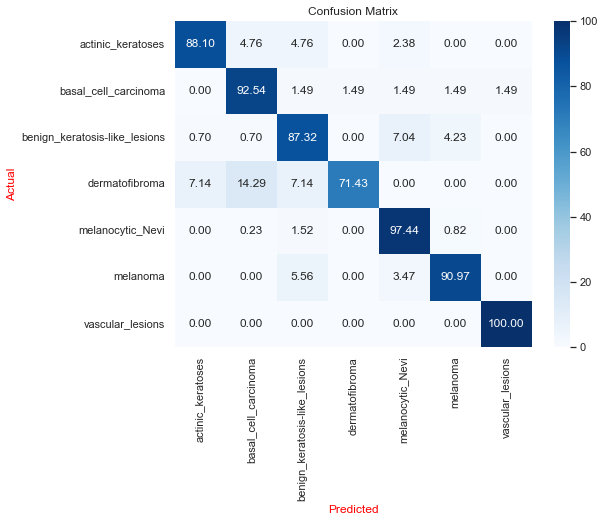

In [58]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_test_pred_svm)

# Get the actual class labels from your dataset (replace 'class_labels' with the actual labels)
class_labels = df_train['dx'].unique().tolist()

# Calculate percentages and visualize the confusion matrix using a heatmap
percentage_confusion_mat = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis] * 100

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_confusion_mat, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted',color='red')
plt.ylabel('Actual', color='red')
plt.title('Confusion Matrix')
plt.show()